### sample is classified by a popularity of it's nearest neighbours

In [288]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from collections import Counter

In [289]:
cmap = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

In [290]:
# load data, or actually...create my own


NR_OF_SAMPLES = 500

# set random seed for reproducibility
random.seed(a=10, version=2)
np.random.seed(10)

# create my own dataset
row1 = [random.randint(0, 0) for _ in range(NR_OF_SAMPLES)]
row2 = [random.randint(0, 100) for _ in range(NR_OF_SAMPLES)]
class1 = [0] * NR_OF_SAMPLES

row3 = [random.randint(1, 1) for _ in range(NR_OF_SAMPLES)]
row4 = [random.randint(0, 100) for _ in range(NR_OF_SAMPLES)]
class2 = [1] * NR_OF_SAMPLES

row5 = [random.randint(2, 2) for _ in range(NR_OF_SAMPLES)]
row6 = [random.randint(0, 100) for _ in range(NR_OF_SAMPLES)]
class3 = [2] * NR_OF_SAMPLES

a1 = np.array([row1, row2, class1]).T
a2 = np.array([row3, row4, class2]).T
a3 = np.array([row5, row6, class3]).T

res = np.concatenate((a1, a2, a3))
np.random.shuffle(res)

X = res[:, 0:2]
y = res[:, -1]

In [291]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [292]:
#visualise data

res[:10]

array([[ 1, 61,  1],
       [ 0, 76,  0],
       [ 2, 41,  2],
       [ 2, 59,  2],
       [ 2, 28,  2],
       [ 0, 17,  0],
       [ 2, 92,  2],
       [ 1, 34,  1],
       [ 0, 21,  0],
       [ 2, 59,  2]])

In [293]:
X[:10], y[:10]

(array([[ 1, 61],
        [ 0, 76],
        [ 2, 41],
        [ 2, 59],
        [ 2, 28],
        [ 0, 17],
        [ 2, 92],
        [ 1, 34],
        [ 0, 21],
        [ 2, 59]]),
 array([1, 0, 2, 2, 2, 0, 2, 1, 0, 2]))

In [294]:
X_train.shape, X_test.shape 

((1200, 2), (300, 2))

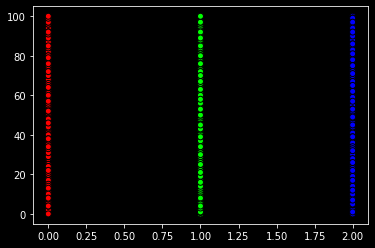

In [295]:
plt.style.use("dark_background")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, edgecolors="k")
plt.show()

In [296]:
len(X), len(y)

(1500, 1500)

In [297]:
X_train[0]

array([ 0, 98])

In [298]:
y_train[0]

0

In [299]:
# eucledeam distance to calculate distances between vectors
# I can confirm that it works on vectors, tested it my self

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [300]:
class KNearestNeighbours:
    def __init__(self, k=3):
        """K: Number of nearest neighbours"""
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X_test):
        # this comprehension will go through every item and return label based on
        #    k most common labels around it
        # self._predict here is done on each vector of X_test
        print("shape", X_test.shape)
        predicted_labels = [self._predict(test_item) for test_item in X_test]
        print(np.array(predicted_labels).shape)
        print("predicted labels", predicted_labels[:5])
        return np.array(predicted_labels)

    def _predict(self, test_item):
        # compute distances of a given item from X_test to every point in X_train.
        # TODO: Why compare it to X_train and not X_test???
        distances = [euclidean_distance(x1=test_item, x2=train_item) for train_item in self.X_train]
        print("distances", distances[:5])
        
        # get k nearest samples, labels
        # arg sort returns indexes in order as the integers are aligned (from smallest) in original list
        # the indexes will be used to return by index item from y_train
        k_indices = np.argsort(distances)[:self.k]
        print("k_indices", k_indices)
        k_nearest_labels = [self.y_train[index] for index in k_indices]
        print("k_nearest_labels", k_nearest_labels)
        
        # majority vote, most common class label in k nearest neighbours
        most_common = Counter(k_nearest_labels).most_common(1)
        print("most_common", most_common[0][0])
        print("-"*20)
        return most_common[0][0]
    

In [301]:
classifier = KNearestNeighbours(k=3)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test=X_test)
accuracy = np.sum(predictions==y_test) / len(y_test)


shape (300, 2)
distances [33.06055050963308, 10.198039027185569, 39.0, 28.071337695236398, 13.038404810405298]
k_indices [639 912 953]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [1.0, 42.0, 71.02816342831905, 4.0, 19.026297590440446]
k_indices [140 791 822]
k_nearest_labels [0, 0, 0]
most_common 0
--------------------
distances [89.02246907382428, 46.04345773288535, 17.0, 84.02380615040002, 69.00724599634447]
k_indices [570 267 552]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [19.1049731745428, 24.08318915758459, 53.0, 14.142135623730951, 1.4142135623730951]
k_indices [785 223 518]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [15.132745950421556, 28.071337695236398, 57.0, 10.198039027185569, 5.0990195135927845]
k_indices [ 511  330 1111]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [61.00819617067857, 18.027756377319946, 11.045361017187261, 56.00892785976178, 41.0]
k_indices [

k_indices [607 939 640]
k_nearest_labels [1, 1, 1]
most_common 1
--------------------
distances [98.0, 55.0, 26.076809620810597, 93.0, 78.00640999302557]
k_indices [ 97 303 265]
k_nearest_labels [0, 0, 0]
most_common 0
--------------------
distances [67.0, 24.0, 5.385164807134504, 62.0, 47.01063709417264]
k_indices [647 814 828]
k_nearest_labels [0, 0, 0]
most_common 0
--------------------
distances [39.05124837953327, 4.47213595499958, 33.0, 34.058772731852805, 19.026297590440446]
k_indices [ 519 1011  913]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [95.02105029939419, 52.03844732503075, 23.0, 90.0222194794152, 75.0066663703967]
k_indices [726 186 417]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [19.026297590440446, 24.020824298928627, 53.009433122794285, 14.035668847618199, 1.0]
k_indices [625 490 117]
k_nearest_labels [1, 1, 1]
most_common 1
--------------------
distances [73.02739212103907, 30.066592756745816, 1.0, 68.0294054

k_indices [506 212 921]
k_nearest_labels [0, 0, 0]
most_common 0
--------------------
distances [83.02409288875127, 40.049968789001575, 11.0, 78.02563681252464, 63.00793600809346]
k_indices [ 747  779 1142]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [0.0, 43.0, 72.02777242147643, 5.0, 20.024984394500787]
k_indices [  0 256 555]
k_nearest_labels [0, 0, 0]
most_common 0
--------------------
distances [2.23606797749979, 42.04759208325728, 71.0, 4.47213595499958, 19.026297590440446]
k_indices [ 199 1067  497]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [78.00640999302557, 35.014282800023196, 6.082762530298219, 73.00684899377592, 58.0]
k_indices [550 214 873]
k_nearest_labels [1, 1, 1]
most_common 1
--------------------
distances [4.47213595499958, 39.05124837953327, 68.0, 2.23606797749979, 16.0312195418814]
k_indices [ 881 1115  132]
k_nearest_labels [2, 2, 1]
most_common 2
--------------------
distances [59.0, 16.0, 13.1529464379659

k_indices [254 241 871]
k_nearest_labels [1, 1, 1]
most_common 1
--------------------
distances [43.01162633521314, 1.0, 29.017236257093817, 38.01315561749642, 23.0]
k_indices [1056  602  874]
k_nearest_labels [1, 1, 0]
most_common 1
--------------------
distances [80.00624975587844, 37.013511046643494, 8.06225774829855, 75.0066663703967, 60.0]
k_indices [525 714 139]
k_nearest_labels [1, 1, 2]
most_common 1
--------------------
distances [53.009433122794285, 10.04987562112089, 19.026297590440446, 48.010415536631214, 33.0]
k_indices [961 564 851]
k_nearest_labels [1, 1, 1]
most_common 1
--------------------
distances [74.02702209328699, 31.064449134018133, 2.0, 69.02897942168927, 54.00925846556311]
k_indices [1113 1078 1137]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [80.02499609497022, 37.05401462729781, 8.0, 75.02666192761077, 60.00833275470999]
k_indices [398 139 687]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [79.0, 36.0, 7.

k_indices [706 962 596]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [74.00675644831355, 31.016124838541646, 2.23606797749979, 69.00724599634447, 54.0]
k_indices [1055  272 1065]
k_nearest_labels [1, 1, 0]
most_common 1
--------------------
distances [89.00561780022652, 46.010868281309364, 17.029386365926403, 84.00595217006948, 69.0]
k_indices [570 583 556]
k_nearest_labels [2, 1, 1]
most_common 1
--------------------
distances [9.0, 34.0, 63.0317380372777, 4.0, 11.045361017187261]
k_indices [ 930 1163  921]
k_nearest_labels [0, 0, 0]
most_common 0
--------------------
distances [24.08318915758459, 19.1049731745428, 48.0, 19.1049731745428, 4.123105625617661]
k_indices [620  60 466]
k_nearest_labels [2, 2, 2]
most_common 2
--------------------
distances [83.00602387778854, 40.01249804748511, 11.045361017187261, 78.00640999302557, 63.0]
k_indices [ 397 1087  123]
k_nearest_labels [1, 1, 1]
most_common 1
--------------------
distances [85.00588214941364, 42.0119

In [302]:
# result in % (1 = 100%)
accuracy

0.99

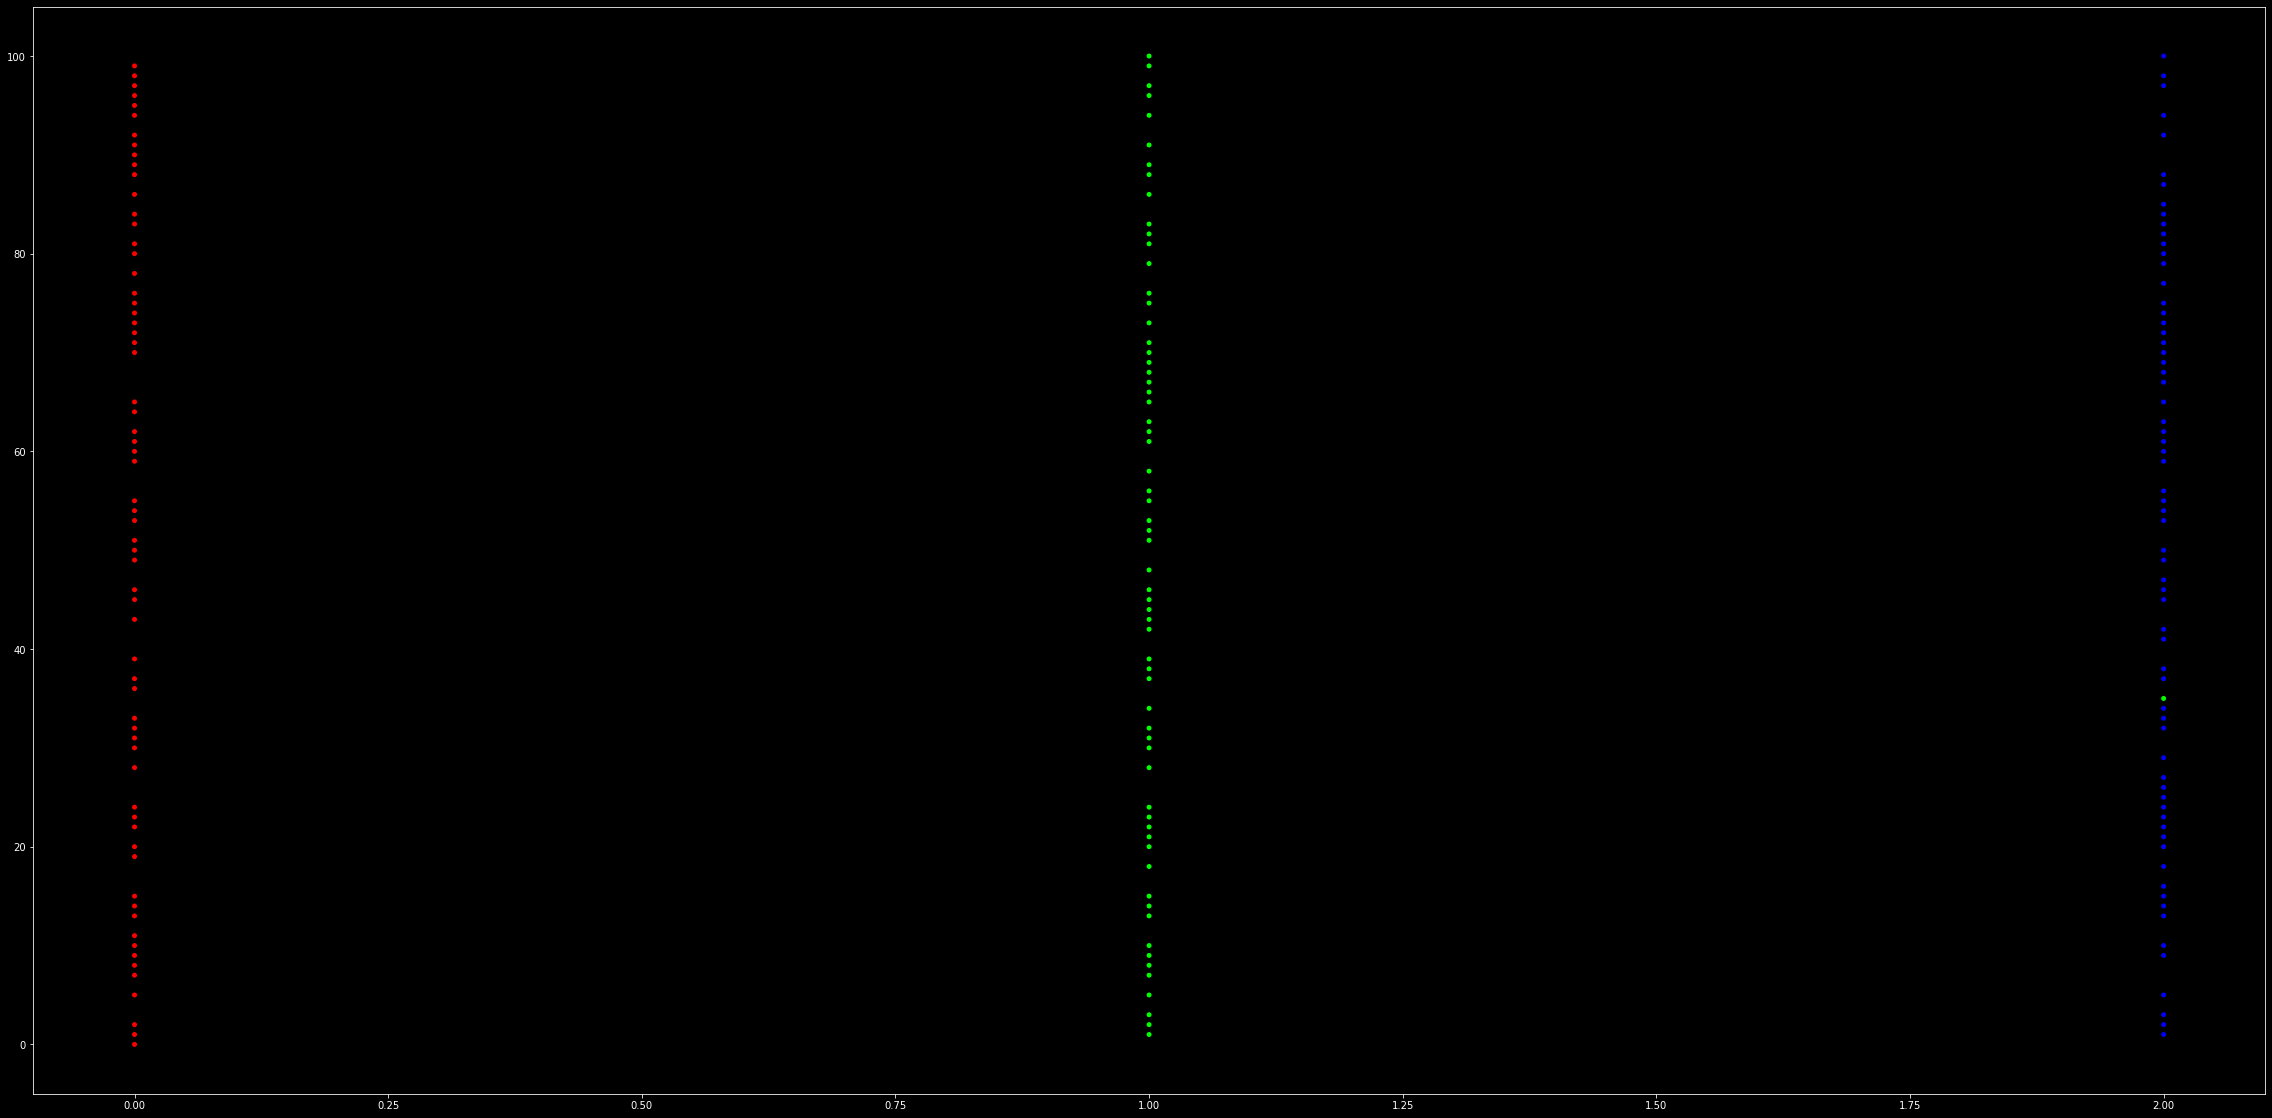

In [303]:
# notice that there is some error
plt.figure(figsize=(40, 20))
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap=cmap, edgecolors="k")
plt.show()